0.7402327404075552 0.8401287319612003 0.9229857184190939 0.9352730264447413


D:\Users\ouyangqq\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family [''] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
D:\Users\ouyangqq\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['simSun'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


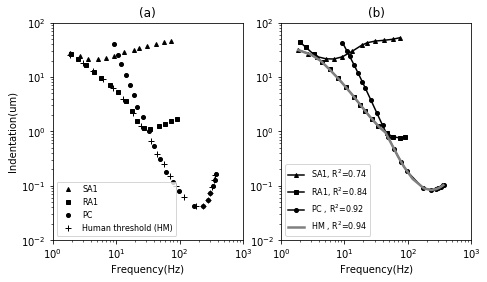

In [2]:
#frequency reponse
from sys import path
import ultils as alt
import Receptors as receptorlib
import matplotlib.pyplot as plt
import numpy as np

color_bf=['k','k','k','k']
#filepath=''
'''Mean square error root'''  
def rmse(y_test, y):  
    return np.sqrt(np.mean((y_test - y) ** 2))  
  
'''The degree of excellence compared to the mean is between [0~1]. 
0 means not as good as the mean. 1 indicates perfect prediction. 
The implementation of this version is based on the scikit-learn official website document.
'''  
def R2(y_test, y_true):  
    return 1 - ((y_test - y_true)**2).sum() / ((y_true - y_true.mean())**2).sum()  
   

C=np.hstack([alt.read_data('data/all_fr.txt',[1,2,3,4]),np.loadtxt('data/all_fr.txt')])
ftSA1=C[C[:,0]==3,1:3]
ftRA1=C[C[:,0]==2,1:3]
ftPC=C[C[:,0]==4,1:3]
ftHM=C[C[:,0]==1,1:3]

#----Reprint obsevered frequency-threshold from previous literature 
plt.figure(figsize=(7.5,4)) 
plt.subplot(1,2,1)

plt.xscale('log')
plt.yscale('log')
plt.plot(ftSA1[:,0],ftSA1[:,1],'k^',label=u'SA1',markersize=4)
plt.plot(ftRA1[:,0],ftRA1[:,1],'ks',label=u'RA1',markersize=4)
#plt.plot(ftSA2[:,0],ftSA2[:,1],'kd-',label=u'SA2')
plt.plot(ftPC[:,0],ftPC[:,1],'ko',label=u'PC',markersize=4)
plt.plot(ftHM[:,0],ftHM[:,1],'k+',markersize=6,label=u'Human threshold (HM)')
plt.title(u"(a)") 
plt.xticks([1,10,100,1000]) 
plt.yticks([0.01,0.1,1,10,100])  
plt.xlabel(u"Frequency(Hz)", fontproperties='')
plt.ylabel(u"Indentation(um)", fontproperties='')
plt.legend(prop={'family':'simSun','size':8}) 
#-----------------------------


#----Prediction of our model
plt.subplot(1,2,2)
freq=np.linspace(1,1000,1000)
th=np.zeros((5,freq.size))
thall=np.zeros((5,freq.size))
fm=0
BW=0

def data_cal(x,tpye):
    tsensor=receptorlib.tactile_receptors(Ttype=tpye,simTime=0.2,sample_rate=100000,sample_num=1)
    if(tpye=="SA1"):
        freq1=ftSA1[:,0]
    elif(tpye=="RA1"):
        freq1=ftRA1[:,0]
    elif(tpye=="PC"):
        freq1=ftPC[:,0]
    for i in range(int(freq1.size)):
        th[x,i]= 1e6* tsensor.VL/np.abs(receptorlib.transfer_func(1j*2*np.pi*freq1[i],[tsensor.Kb1,tsensor.Kb2,tsensor.Kb3],tsensor.Ku,tsensor.wbl,tsensor.wbh,tsensor.wl,tsensor.N))/tsensor.As
    
   
data_cal(0,"SA1")
data_cal(1,"RA1")
data_cal(2,"PC")

tpye="HM"
if(tpye=="HM"):
    freq1=ftHM[:,0]
    tsensor=receptorlib.tactile_receptors(Ttype="SA1",simTime=0.2,sample_rate=100000,sample_num=1)
    for i in range(int(freq1.size)):
        thall[0,i]= 1e6* tsensor.VL/np.abs(receptorlib.transfer_func(1j*2*np.pi*freq1[i],[tsensor.Kb1,tsensor.Kb2,tsensor.Kb3],tsensor.Ku,tsensor.wbl,tsensor.wbh,tsensor.wl,tsensor.N))/tsensor.As
        
    tsensor=receptorlib.tactile_receptors(Ttype="RA1",simTime=0.2,sample_rate=100000,sample_num=1)
    for i in range(int(freq1.size)):
        thall[1,i]= 1e6* tsensor.VL/np.abs(receptorlib.transfer_func(1j*2*np.pi*freq1[i],[tsensor.Kb1,tsensor.Kb2,tsensor.Kb3],tsensor.Ku,tsensor.wbl,tsensor.wbh,tsensor.wl,tsensor.N))/tsensor.As
       
    tsensor=receptorlib.tactile_receptors(Ttype="PC",simTime=0.2,sample_rate=100000,sample_num=1)
    for i in range(int(freq1.size)):
        thall[2,i]= 1e6* tsensor.VL/np.abs(receptorlib.transfer_func(1j*2*np.pi*freq1[i],[tsensor.Kb1,tsensor.Kb2,tsensor.Kb3],tsensor.Ku,tsensor.wbl,tsensor.wbh,tsensor.wl,tsensor.N))/tsensor.As  
    for i in range(int(freq1.size)):
            th[3,i]=np.min(thall[0:3,i])   
         
plt.xscale('log')
plt.yscale('log')
R2_SA1=R2(np.log10(th[0,0:ftSA1[:,0].size]),np.log10( ftSA1[:,1]))
R2_RA1=R2(np.log10(th[1,0:ftRA1[:,0].size]), np.log10(ftRA1[:,1]))
R2_PC=R2(np.log10(th[2,0:ftPC[:,0].size]), np.log10(ftPC[:,1]))
R2_HM=R2(np.log10(th[3,0:ftHM[:,0].size]),np.log10( ftHM[:,1]))
plt.plot(ftSA1[:,0],th[0,0:ftSA1[:,0].size],color_bf[0]+'^-',markersize=4,
         label='SA1, '+"$\mathrm{R}^{2}$="+str(round(R2_SA1,2)))
plt.plot(ftRA1[:,0],th[1,0:ftRA1[:,0].size],color_bf[1]+'s-',markersize=4,
         label='RA1, '+"$\mathrm{R}^{2}$="+str(round(R2_RA1,2)))
plt.plot(ftPC[:,0],th[2,0:ftPC[:,0].size],color_bf[2]+'o-',markersize=4,
         label='PC , '+"$\mathrm{R}^{2}$="+str(round(R2_PC,2)))
plt.plot(ftHM[:,0],th[3,0:ftHM[:,0].size],color='gray',markersize=4,linewidth=2.5,
         label='HM , '+"$\mathrm{R}^{2}$="+str(round(R2_HM,2)))

print(R2_SA1,R2_RA1,R2_PC,R2_HM)
plt.title(u"(b)") 
plt.xticks([1,10,100,1000]) 
plt.yticks([0.01,0.1,1,10,100])   
plt.xlabel(u"Frequency(Hz)", fontproperties='')
plt.legend(prop={'family':'simSun','size':8}) 
#-----------------------


filepath='saved_figs/'
plt.savefig(filepath+'frequency_response.png',bbox_inches='tight', dpi=600)
